In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#facebook prophet(FB Prophet)
#additive model
# y=trend+seasonlity+holiday+error

#fbprophet-> columns: date:ds, data:y

In [7]:
df = pd.read_csv(r'/content/covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [9]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [10]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

<Axes: >

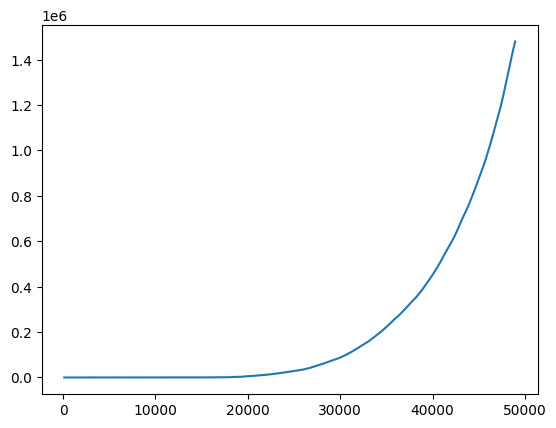

In [11]:
df[df['Country/Region'] == "India"]["Confirmed"].plot()

<Axes: xlabel='Date'>

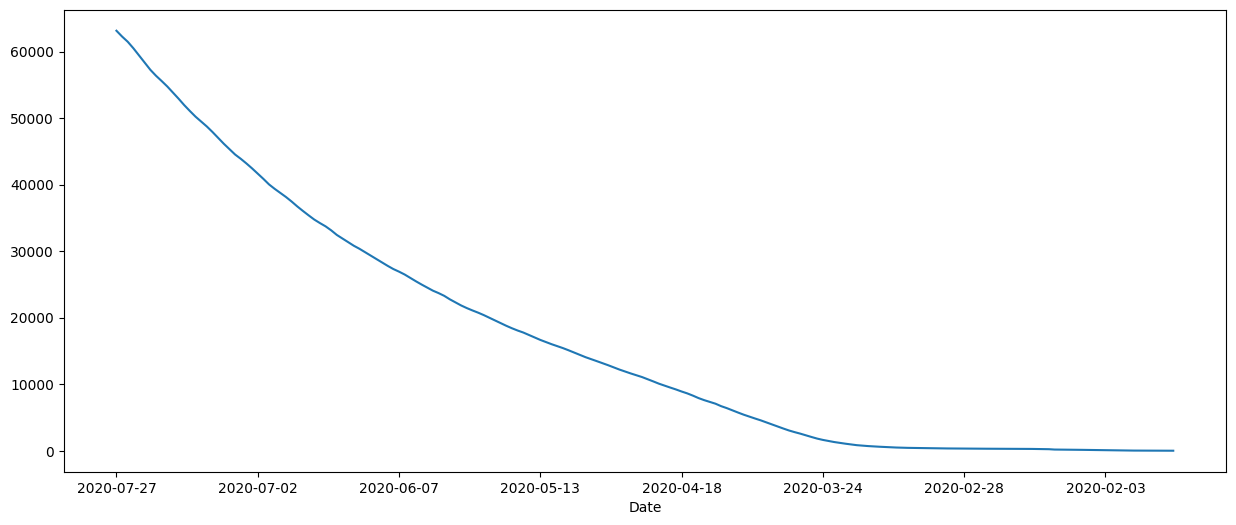

In [12]:
# Plot the Avg of confirmed cases throughout the data of all country.

plt.figure(figsize=(15,6))
Avg_confirmed = df.groupby('Date')['Confirmed'].mean().sort_values(ascending=False).plot()

Avg_confirmed

<Axes: ylabel='Country/Region'>

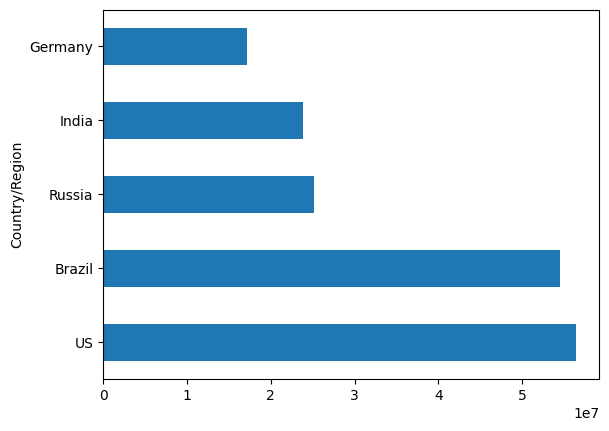

In [13]:
# Top 5 countries which have highest recovery?

df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False)[:5].plot(kind='barh')

<Axes: xlabel='Country/Region'>

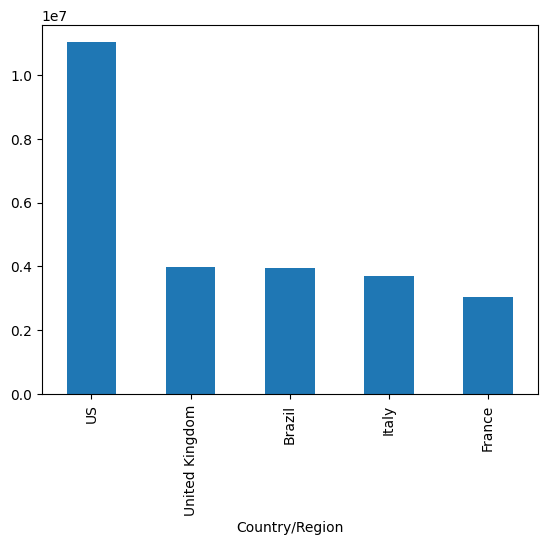

In [14]:
# Top 5 countries which have highest Deaths?

df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

In [15]:
# WHO Regions

df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [16]:
# Active cases trends in each region?

df.groupby('WHO Region')['Active'].sum()

,Active
WHO Region,
Africa,10158119
Americas,225832458
Eastern Mediterranean,24108160
Europe,106406678
South-East Asia,23629904
Western Pacific,6580031


<Axes: title={'center': 'WHO Region'}, ylabel='Active'>

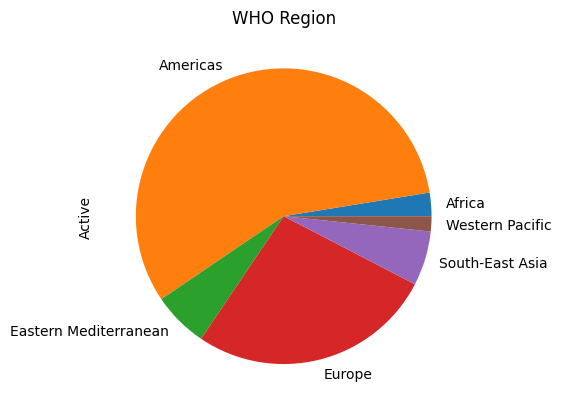

In [17]:
df.groupby('WHO Region')['Active'].sum().plot(kind='pie', title='WHO Region')

In [18]:
df_india = df[df['Country/Region']== 'India']
df_india

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [19]:
df_india = df_india[['Date','Active']]
df_india

,Date,Active
129,2020-01-22,0
390,2020-01-23,0
651,2020-01-24,0
912,2020-01-25,0
1173,2020-01-26,0
...,...,...
47892,2020-07-23,440298
48153,2020-07-24,456234
48414,2020-07-25,468002
48675,2020-07-26,485277


In [20]:
df_india.rename(columns={'Date': 'ds', 'Active':'y'}, inplace=True)
df_india

/tmp/ipython-input-676619795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india.rename(columns={'Date': 'ds', 'Active':'y'}, inplace=True)


,ds,y
129,2020-01-22,0
390,2020-01-23,0
651,2020-01-24,0
912,2020-01-25,0
1173,2020-01-26,0
...,...,...
47892,2020-07-23,440298
48153,2020-07-24,456234
48414,2020-07-25,468002
48675,2020-07-26,485277


In [21]:
df_india['ds'] = pd.to_datetime(df_india['ds'])
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.5 KB


/tmp/ipython-input-209094447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['ds'] = pd.to_datetime(df_india['ds'])


In [22]:
df_india.isnull().sum()

,0
ds,0
y,0


In [23]:
df_india.duplicated().sum()


np.int64(0)

In [24]:
df_india['ds'].max()

Timestamp('2020-07-27 00:00:00')

In [25]:
dates = pd.date_range(start = df_india['ds'].min(), end = df_india['ds'].max(), freq= 'D')
missing_dates = dates.difference(df_india['ds'])
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [26]:
!pip install prophet

In [27]:
from prophet import Prophet

In [28]:
# h = Holidays

h = pd.DataFrame({'holiday':['new year','Independence day'],
                'ds':[pd.to_datetime('2020-01-01'),pd.to_datetime('2020-08-15')]})
h

,holiday,ds
0,new year,2020-01-01
1,Independence day,2020-08-15


In [29]:
!pip uninstall -y prophet
!pip install prophet
from prophet import Prophet

model_prophet = Prophet(holidays=h)
model_prophet.fit(df_india)

Found existing installation: prophet 1.2.1
Uninstalling prophet-1.2.1:
  Successfully uninstalled prophet-1.2.1
  Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.5 kB)
Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (12.1 MB)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future_df = model_prophet.make_future_dataframe(periods=30, include_history=False, freq='D')
future_df


,ds
0,2020-07-28
1,2020-07-29
2,2020-07-30
3,2020-07-31
4,2020-08-01
5,2020-08-02
6,2020-08-03
7,2020-08-04
8,2020-08-05
9,2020-08-06


In [31]:
# Forcasting
forcast = model_prophet.predict(future_df)
forcast.head()


#yhat= final output(yhat_lower	yhat_upper)
#trend-trend(trend_lower	trend_upper)
#weekly-seasonality(weekly_lower	weekly_upper)
#multiplicative_terms-holiday(multiplicative_terms_lower	multiplicative_terms_upper)
#additive_terms-error(additive_terms_lower	additive_terms_upper)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Independence day,Independence day_lower,Independence day_upper,additive_terms,...,new year,new year_lower,new year_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-28,452414.371474,437642.078553,465190.821049,452414.371474,452414.371474,0.0,0.0,0.0,-1105.495432,...,0.0,0.0,0.0,-1105.495432,-1105.495432,-1105.495432,0.0,0.0,0.0,451308.876043
1,2020-07-29,460179.094262,446931.141227,473895.245044,460146.803767,460236.162618,0.0,0.0,0.0,-473.966685,...,0.0,0.0,0.0,-473.966685,-473.966685,-473.966685,0.0,0.0,0.0,459705.127577
2,2020-07-30,467943.817049,453069.402178,480773.653207,467730.724618,468155.002136,0.0,0.0,0.0,-606.274456,...,0.0,0.0,0.0,-606.274456,-606.274456,-606.274456,0.0,0.0,0.0,467337.542593
3,2020-07-31,475708.539837,461756.042493,489789.648871,475309.148077,476130.434613,0.0,0.0,0.0,-94.856209,...,0.0,0.0,0.0,-94.856209,-94.856209,-94.856209,0.0,0.0,0.0,475613.683628
4,2020-08-01,483473.262625,470011.472598,497991.609118,482764.322828,484167.989536,0.0,0.0,0.0,188.767675,...,0.0,0.0,0.0,188.767675,188.767675,188.767675,0.0,0.0,0.0,483662.030300


In [32]:
final_forcast = forcast[['ds','yhat','yhat_lower',	'yhat_upper']]

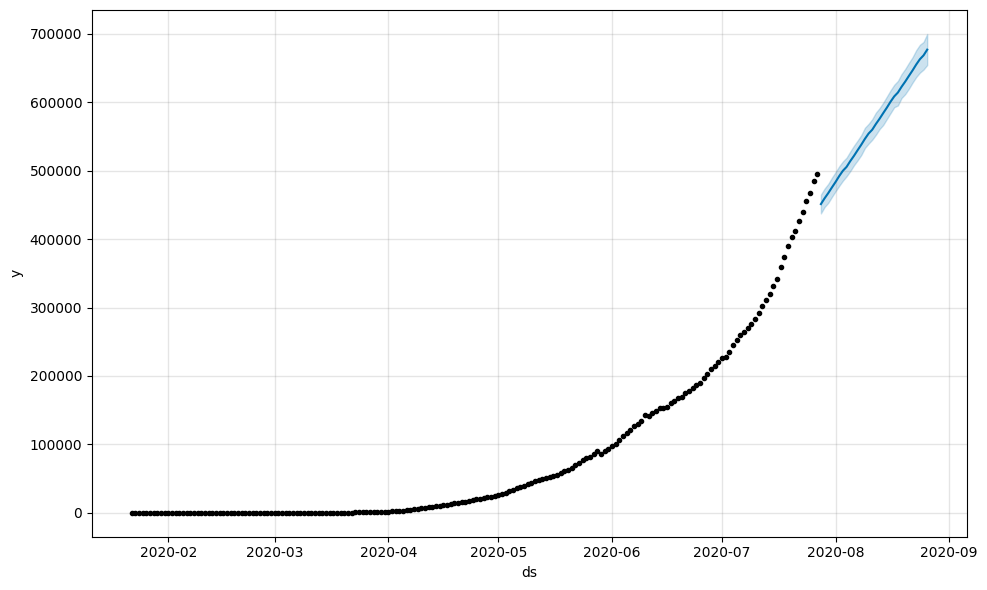

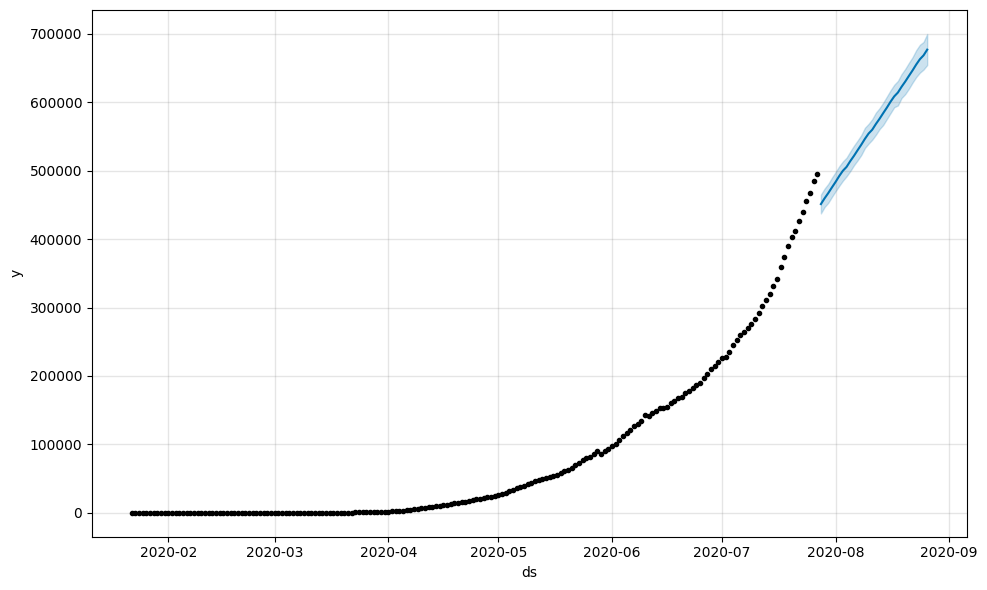

In [33]:
model_prophet.plot(final_forcast)

In [48]:
# from datetime import date
# import holidays

In [46]:
# import holidays

# # Get all Indian holidays for 2025
# ind_holidays_dict = holidays.India(years=2025)

# # Convert the dictionary of holidays into a list of dictionaries
# # suitable for creating a DataFrame for Prophet
# holiday_data = [{'ds': pd.to_datetime(date), 'holiday': name} for date, name in ind_holidays_dict.items()]

# # Create the DataFrame
# ind_holiday = pd.DataFrame(holiday_data)

# ind_holiday

,ds,holiday
0,2025-01-26,Republic Day
1,2025-08-15,Independence Day
2,2025-10-02,Dussehra; Gandhi Jayanti
3,2025-05-12,Buddha Purnima
4,2025-10-20,Diwali
5,2025-08-16,Janmashtami
6,2025-04-10,Mahavir Jayanti
7,2025-02-26,Maha Shivaratri
8,2025-11-05,Guru Nanak Jayanti
9,2025-07-06,Ashura
